In [56]:
import cv2
import numpy as np

def match_images(train_image, test_image):

    star = cv2.xfeatures2d.StarDetector_create()
    fast = cv2.FastFeatureDetector_create()
    orb = cv2.ORB_create()
    sift = cv2.SIFT_create()


    # Initiate BRIEF extractor 
    brief = cv2.xfeatures2d.BriefDescriptorExtractor_create()
    
    # find the keypoints with STAR

    train_keypoints1 = fast.detect(train_image, None)
    test_keypoints1 = fast.detect(test_image, None)

    # train_keypoints1 = star.detect(train_image, None)
    # test_keypoints1 = star.detect(test_image, None)

    # train_keypoints1 = sift.detect(train_image, None)
    # test_keypoints1 = sift.detect(test_image, None)
    
    # train_keypoints1,train_descriptor1 = orb.detectAndCompute(train_image, None)
    # test_keypoints1,test_descriptor1 = orb.detectAndCompute(test_image, None)
    
    # compute the descriptors with BRIEF
    train_keypoints, train_descriptor = brief.compute(train_image, train_keypoints1)
    test_keypoints, test_descriptor = brief.compute(test_image, test_keypoints1)   

    # Create a Brute Force Matcher
    bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)

    # Match descriptors
    matches = bf.match(train_descriptor, test_descriptor)
    
    matches = sorted(matches, key=lambda x: x.distance)
   
    similarity_score = len(matches)

    return similarity_score


In [57]:
# Load the banana images
train_image = cv2.imread('train_banana.png', cv2.IMREAD_GRAYSCALE)
train_image = cv2.pyrDown(train_image)

test_image = cv2.imread('test_data/test_banana.png', cv2.IMREAD_GRAYSCALE)
# test_image = ndimage.rotate(test_image, 45)
test_image = cv2.pyrDown(test_image)

# Match the images
similarity_score = match_images(train_image, test_image)

# Define a threshold for similarity score
threshold = 35

print(similarity_score)
# Determine if the images depict the same fruit or different fruits
if similarity_score >= threshold:
    print("The images depict the same fruit.")
else:
    print("The images depict different fruits.")

6
The images depict different fruits.


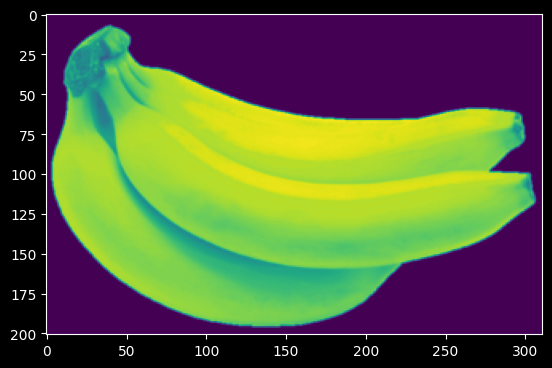

In [58]:
import matplotlib.pyplot as plt


plt.imshow(test_image)

In [59]:
fruits = ["apple", "banana", "tomato"]

def classify_fruit(image):
  
  fast = cv2.FastFeatureDetector_create() 
  brief = cv2.xfeatures2d.BriefDescriptorExtractor_create()
  # Detect keypoints and compute descriptors for both image and reference images
  test_keypoints = fast.detect(image, None)
  test_keypoints, test_descriptors = brief.compute(image, test_keypoints)

  # Define reference features for each fruit class (manually create or load pre-computed)
  reference_features = {}
  for fruit in fruits:
    # Load reference image for the fruit class (replace with your image loading logic)
    train_image = cv2.imread(f"train_{fruit}.png", cv2.IMREAD_GRAYSCALE)
    # train_image_gray = cv2.cvtColor(train_image, cv2.COLOR_BGR2GRAY)

    train_keypoints = fast.detect(image, None)
    train_keypoints, train_descriptors = brief.compute(train_image, train_keypoints)
    reference_features[fruit] = train_descriptors

  # Matching with Brute-Force Matcher and Hamming distance
  bf = cv2.BFMatcher(cv2.NORM_HAMMING)
  best_matches = []
  best_fruit = None

  for fruit, train_descriptors in reference_features.items():
    matches = bf.match(train_descriptors, test_descriptors)
    matches = sorted(matches, key=lambda x: x.distance)

    # Consider number of good matches for classification
    if len(matches) > len(best_matches):
      best_matches = matches
      best_fruit = fruit

  # Confidence threshold (optional)
  return best_fruit

In [60]:
fruit_label = classify_fruit(test_image)
print(fruit_label)

tomato
